# Credit card fraud detection with Logistic, Decision Tree and Random Forest Classifier algorithms in Python

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler

# Models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.neighbors import KNeighborsClassifier # KNN algorithm
from sklearn.svm import SVC # SVM algorithm

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score

In [44]:
import seaborn as sns

### About dataset
- The dataset contains transactions made by credit cards in September 2013 by European cardholders.
- This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

- It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

- Given the class imbalance ratio, we recommend measuring the accuracy using the Area Under the Precision-Recall Curve (AUPRC). Confusion matrix accuracy is not meaningful for unbalanced classification.

In [7]:
df_cc = pd.read_csv("creditcard.csv")

In [8]:
df_cc.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [9]:
#df_cc.info()
df_cc.drop('Time', axis =1, inplace = True)

In [10]:
df_cc.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [11]:
#df_cc.isnull().sum()
#df_cc.isna().sum()

In [12]:
df_cc.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

# from the above its clear shows that its a unbalanced dataset. 

In [13]:
X = df_cc.drop('Class', axis = 1)
Y = df_cc.Class

In [14]:
scaler = StandardScaler()
scaler = scaler.fit(X)
X_scaled = scaler.transform(X)

In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size = 0.2, random_state = 2)

array([-1.99607763,  0.63176283,  0.03696625,  0.25096474,  0.53787863,
       -0.26065727, -0.37085922,  0.00524959, -0.11207962,  0.39941534,
       -0.19043803, -0.91032809,  0.52752828,  0.3503321 , -0.15912383,
       -0.23859084, -0.21860374, -0.13726094, -0.75615595,  0.4280087 ,
       -0.08606732, -0.3344791 , -0.73156958, -0.07088597,  0.13071667,
        0.97670823,  0.59900904, -0.05625172,  0.03585838, -0.28414246])

# Build Differnt models
## Model1: DecisionTreeClassifier 

In [18]:
dtc = DecisionTreeClassifier(max_depth = 4)
dtc.fit(X_train, Y_train)
ypred_dtc = dtc.predict(X_test)

## Model2: RandomForestClassifier 

In [22]:
rfc = RandomForestClassifier(max_depth = 5)
rfc.fit(X_train, Y_train,)
ypred_rfc = rfc.predict(X_test)

## Model3: Logistic Regression 

In [23]:
#LogReg = LogisticRegression(class_weight = 'balanced', solver = 'lbfgs')
Log = LogisticRegression(solver = 'lbfgs')
Log.fit(X_train, Y_train)
ypred_log = Log.predict(X_test)

## Model4: KNeighborsClassifier

In [24]:
knc = KNeighborsClassifier()
knc.fit(X_train, Y_train)
ypred_knc = knc.predict(X_test)

## Model5: SVM 

In [25]:
svc = SVC()
svc.fit(X_train, Y_train)
ypred_svc = svc.predict(X_test)

## Calculate the accuracy of each model

In [29]:
print("Decision Tree Acc: {}", format(accuracy_score(ypred_dtc, Y_test)))
print("Random Forest Classifier Acc: {}", format(accuracy_score(ypred_rfc, Y_test)))
print("Logistic Regression Acc: {}", format(accuracy_score(ypred_log, Y_test)))
print("KNeighbors Classifier Acc: {}", format(accuracy_score(ypred_knc, Y_test)))
print("SVM Acc: {}", format(accuracy_score(ypred_svc, Y_test)))



Decision Tree Acc: {} 0.9992977774656788
Random Forest Classifier Acc: {} 0.9996137776061234
Logistic Regression Acc: {} 0.999420666409185
KNeighbors Classifier Acc: {} 0.9996488887328394
SVM Acc: {} 0.9995611109160493


In [34]:
print("Decision Tree F1 score: {}" .format(f1_score(ypred_dtc, Y_test)))
print("Random Forest Classifier F1 score: {}" .format(f1_score(ypred_rfc, Y_test)))
print("Logistic Regression F1 score: {}" .format(f1_score(ypred_log, Y_test)))
print("KNeighbors Classifier F1 score: {}".format(f1_score(ypred_knc, Y_test)))
print("SVM F1 score: {}".format(f1_score(ypred_svc, Y_test)))

Decision Tree F1 score: 0.7647058823529412
Random Forest Classifier F1 score: 0.858974358974359
Logistic Regression F1 score: 0.7785234899328859
KNeighbors Classifier F1 score: 0.8734177215189872
SVM F1 score: 0.8344370860927153


In [43]:
print("Decision Tree confusion matrix: \n{}" .format(confusion_matrix(ypred_dtc, Y_test)))

Decision Tree confusion matrix: 
[[56857    19]
 [   21    65]]


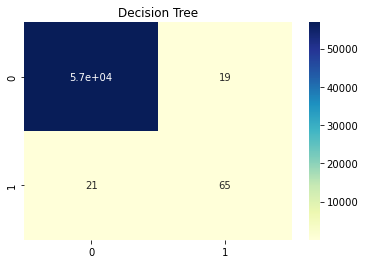

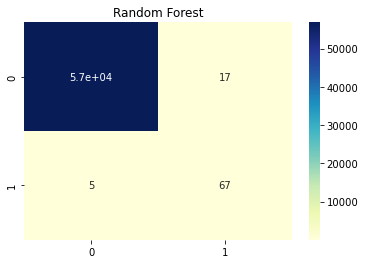

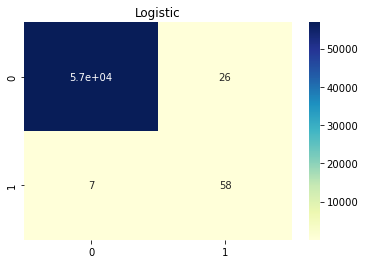

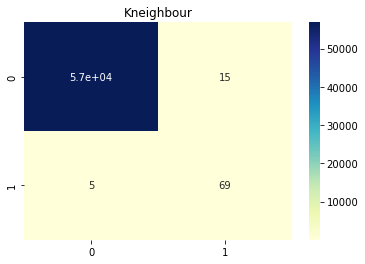

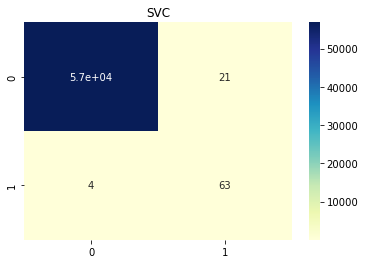

In [92]:
i = j = k = 1
def plot_confusion_matrix(ypred, y_actual, title = 'title'):
    #confusion_matrix(ypred, y_actual, cmap = 'YlGnBu')
    sns.heatmap(confusion_matrix(ypred, y_actual), cmap = 'YlGnBu', annot = True )   
    #sns.heatmap(confusion_matrix(ypred_dtc, Y_test), cmap = 'YlGnBu')
   # plt.subplot(i,j,k)
    plt.title(title)
    
    
plot_confusion_matrix(ypred_dtc, Y_test,  title = 'Decision Tree')
plt.show()
i = 1
j = 2
k = 2
plot_confusion_matrix(ypred_rfc, Y_test,  title = 'Random Forest')
plt.show()   
i = 2
j = 1
k = 3
plot_confusion_matrix(ypred_log, Y_test, title = 'Logistic')
plt.show()   
i = 2
j = 2
k = 4
plot_confusion_matrix(ypred_knc, Y_test,  title = 'Kneighbour')
plt.show()
i = 3
j = 1
k = 5
plot_confusion_matrix(ypred_svc, Y_test,  title = 'SVC')
plt.show()